<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Sorting-Algorithms-Code" data-toc-modified-id="Sorting-Algorithms-Code-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Sorting Algorithms Code</a></span><ul class="toc-item"><li><span><a href="#Selection-Sort" data-toc-modified-id="Selection-Sort-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Selection Sort</a></span></li><li><span><a href="#Insertion-Sort" data-toc-modified-id="Insertion-Sort-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Insertion Sort</a></span></li><li><span><a href="#Merge-Sort" data-toc-modified-id="Merge-Sort-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Merge Sort</a></span></li><li><span><a href="#Quicksort" data-toc-modified-id="Quicksort-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Quicksort</a></span></li><li><span><a href="#Counting-Sort" data-toc-modified-id="Counting-Sort-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Counting Sort</a></span></li></ul></li><li><span><a href="#Benchmarking-Code" data-toc-modified-id="Benchmarking-Code-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Benchmarking Code</a></span><ul class="toc-item"><li><span><a href="#Random-Arrays" data-toc-modified-id="Random-Arrays-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Random Arrays</a></span></li><li><span><a href="#Benchmarking" data-toc-modified-id="Benchmarking-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Benchmarking</a></span></li><li><span><a href="#Averages" data-toc-modified-id="Averages-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Averages</a></span></li></ul></li><li><span><a href="#Running-the-Code:-Results-and-Plots" data-toc-modified-id="Running-the-Code:-Results-and-Plots-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Running the Code: Results and Plots</a></span><ul class="toc-item"><li><span><a href="#Large-Arrays-of-Random-Integers" data-toc-modified-id="Large-Arrays-of-Random-Integers-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Large Arrays of Random Integers</a></span></li><li><span><a href="#Comparison-with-Built-In-Sorting-Function" data-toc-modified-id="Comparison-with-Built-In-Sorting-Function-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Comparison with Built-In Sorting Function</a></span></li><li><span><a href="#Small-Input-Sizes" data-toc-modified-id="Small-Input-Sizes-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Small Input Sizes</a></span></li><li><span><a href="#Sorted-Input" data-toc-modified-id="Sorted-Input-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Sorted Input</a></span></li></ul></li></ul></div>

In [1]:
# import libraries
import time
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Sorting Algorithms Code

The functions for each sorting algorithm are coded below.

### Selection Sort

In [2]:
def selection_sort(alist):
    
    # iterate through each element in the array
    for i in range(len(alist)):
        # set min_index as first index
        min_index = i 
        
        # second iteration compares the element of the first iteration to every other element in the list 
        for j in range(i+1, len(alist)):
            # element value comparisons
            if alist[min_index] > alist[j]:
                # min_index becomes j index when j contains the smaller value 
                min_index = j
        
        # inner loop continues until all elements have been compared to the first loop's element and 
        # min_index now contains the lowest valued element 
        
        # the outer loop index and min-index elements are switched
        alist[i], alist[min_index] = alist[min_index], alist[i]

### Insertion Sort

In [3]:
def insertion_sort(alist): 
    
    # iterate through each element in the array starting from the second element
    for i in range(1, len(alist)):  
        
        # element from unsorted side to be inserted in sorted side
        current_value = alist[i]
        
        # loop back through sorted side until there is an element less then the current value or none left to check 
        while i > 0 and alist[i - 1] > current_value:
            # shift elements to the right
            alist[i] = alist[i - 1]
            # decrement i
            i -= 1
        
        # place current value into correct position in sorted side
        alist[i] = current_value

### Merge Sort

In [4]:
def merge_sort(alist):
    # base case - if alist has just 1 element, it is sorted by default
    if len(alist) > 1:

        # get midpoint value of the list with integer division
        midpoint = len(alist) // 2
    
        # splitting the list in half using the midpoint
        left_list = alist[:midpoint]
        right_list = alist[midpoint:]

        # recursively split the left_list and right_list until the base case is reached
        merge_sort(left_list)
        merge_sort(right_list)
        
        # Recursion ends when sub-lists contain a maximum of 1 element and thus are sorted.

        
        # Remainder of code returns to caller once base case is reached merging smaller sorted lists into larger sorted lists
        
        l = 0     # Index value for left_list
        r = 0     # Index value for right_list
        a = 0     # Index value for alist

        # compare left and right lists and merge them into sorted lists, placing the sorted elements back into alist
        
        # loops through each left and right list until it runs out of elements to check
        while l < len(left_list) and r < len(right_list):
            
            # the smallest value gets placed back into alist (<= keeps algorithm stable, maintaining the order of alist ) 
            if left_list[l] <= right_list[r]: 
                alist[a] = left_list[l]
                l += 1
            else:
                alist[a] = right_list[r]
                r += 1
            # alist index is incremented for the next smallest value to be placed 
            a += 1

        # Some lists will not have left/right counterpart and so are inserted into alist below       
        while l < len(left_list):
            alist[a] = left_list[l]
            l += 1
            a += 1

        while r < len(right_list):
            alist[a] = right_list[r]
            r += 1
            a += 1

### Quicksort

In [5]:
# main function to be called   
def quick_sort(alist):
    
    # helper function that will be called recursively to partition a list
    def quick_helper(items, low, high):
        
        # base case - recursion ends when there are no more low indexes relative to high indexes
        if low < high:
            
            # call the partition() function which defines the pivot and compares the other elements to it
            split_index = partition(items, low, high)
            
            # value returned by split_index creates high and low values in subsequent calls of helper
            quick_helper(items, low, split_index)        # left lists
            quick_helper(items, split_index + 1, high)   # right lists

    # first call of helper - low and high are set to the lowest and highest index values of alist
    quick_helper(alist, 0, len(alist) - 1)
    
# creates partitions and checks values of left and right lists against the pivot
def partition(alist, low, high):
    
    # middle element of a list will be the pivot
    pivot = alist[(low + high) // 2]
    
    # left-list index
    l = low - 1
    # right list index
    r = high + 1

    # runs until the value of r is returned to the split_index variable in quick_helper
    while True:
        
        # loops while values in the left list that are less than the pivot - ends when a greater value is encountered
        l += 1
        while alist[l] < pivot:
            l += 1

        # loops while values in the left list that are greater than the pivot - ends when a lesser value is encountered
        r -= 1
        while alist[r] > pivot:
            r -= 1

        # once the left and right indexes meet or overlap, the value of r is returned    
        if l >= r:
            return r
        
        # if r not returned during the loop, the value in the left list that was not less than the pivot is switched with 
        # the value on the right that was not greater than the pivot, placing them on the correct side of the pivot
        alist[l], alist[r] = alist[r], alist[l]

### Counting Sort

In [6]:
# k set to 100 - maximum value of list elementes
def counting_sort(alist, max_val=100):
    # maximum index value in count
    m = max_val + 1
    # count list - indexes represent all the possible values contained in alist 
    count = [0] * m                     
    
    # iterate through alist and translate the values to indexes in count to track the frequency of each element 
    for a in alist:                  
        # increment count to record the number of times each element occurs alist 
        count[a] += 1                              
     
    # i represents the indexes of alist 
    i = 0
    # iterate through the indexes of count and append the correct amount of each element back into a sorted list 
    for a in range(m):             
        for c in range(count[a]):  
            alist[i] = a         
            i += 1

## Benchmarking Code

The functions below each perform a particular part of the benchmarking process.

### Random Arrays

random_array() creates an array of size n that consists of random integers between the values 0-100 inclusive.

In [7]:
def random_array(n):
    
    # initialise empty array to contain results
    array = []
    
    # append specific number of random integers to array
    for i in range(0, n):
        array.append(random.randint(0, 100))
    
    return array

n_size represents the number of elements to be contained in each array created by random_array()

In [8]:
# input sizes 
n_size = [100, 250, 500, 750, 1000, 1250, 2500, 3750, 5000, 6250, 7500, 8750, 10000]

all_arrays takes n_size as an argument and returns an array that contains 13 arrays of random integers.. Each array contains the number of elements represented by each number in n_size.  

In [9]:
def all_arrays(n_size):
    
    # initialise empty array to contain results
    arrays = []
    
    # for each element in n-size, append an array to arrays
    for n in n_size:
        arrays.append(random_array(n))
        
    return arrays
    

### Benchmarking

The code below takes one of the sorting algorithms as an argument and benchmarks it by recording the times when the algorithm starts and ends to calculate the amount of time it takes for the algorithm to complete its process. It uses all_arrays() to create arrays, and each one is passed to the sorting algorithm and the time taken measured for each. 

In [10]:
def benchmark(sort):
    
    # create array of arrays of random integers of various sizes
    arrays = all_arrays(n_size)
    
    # initialise list to contain the running times for each algorithm
    sort_time = []
        
    # time test for each array passed to each algorithm
    for array in arrays:
        start_time = time.time()
        sort(array)
        end_time = time.time()
        # time elapsed multiplied by 1000 to get milliseconds
        time_elapsed = (end_time - start_time) * 1000
        # each time measurement is appended to sort_time
        sort_time.append(time_elapsed)
    
    return sort_time

### Averages

In the average_time() function, the benchmark() function is run ten times to get an average time for an algorithm to sort each input size.

In [11]:
def average_time(sort):
    
    # initialise list to contain all time measurements returned by benchmark()
    times = []

    # Calculate benchmark 10 times, appending all result to times 
    for i in range(0, 10):
        time = benchmark(sort)
        times.append(time) 
    
    # times converted to numpy array to perform average method
    arr_times = np.array(times)
    
    # the average of the same indexed element of each array in times is calculated 
    average = np.mean(arr_times, axis=0)
    
    return average

all_averages takes each sorting function and runs it through the average_time() function, which in turn runs the benchmark() for each algorithm. When this function is run, all functions specified in algorithm_func are called in turn. 

In [12]:
# contains the sorting algorithm functions so they can be iterated through
algorithm_func = [selection_sort, insertion_sort, merge_sort, quick_sort, counting_sort]

In [13]:
def all_averages():
    
    # initialise list to contain all average times for all sorting algorithms across all input sizes
    averages = []

    # iterate through each sorting function and append average times for each one to averages
    for a in algorithm_func:
        averages.append(average_time(a))
    
    return averages

## Running the Code: Results and Plots

### Large Arrays of Random Integers

Benchmarking all algorithms for random integers of increasing size.

In [14]:
# call all_averages 
averages = all_averages()

Creating a dataframe to display the results of the benchmarking.

In [15]:
# indexes for dataframe
algorithm_names = ['Selection Sort', 'Insertion Sort', 'Merge Sort', 'Quicksort', 'Counting Sort']

# create dataframe
df = pd.DataFrame(averages, columns=n_size, index=algorithm_names)
# round to 3 decimal places for neatness
df = df.round(3)
df

,100,250,500,750,1000,1250,2500,3750,5000,6250,7500,8750,10000
Selection Sort,0.100,2.297,8.178,19.644,30.719,46.275,184.083,409.761,731.446,1060.793,1488.384,2200.410,2969.374
Insertion Sort,0.395,2.194,8.979,21.942,40.292,63.331,264.050,664.030,1115.022,1737.150,2538.212,3334.289,4588.498
Merge Sort,0.499,0.299,1.798,2.492,2.995,3.990,9.066,14.172,19.245,24.840,30.318,36.005,41.687
Quicksort,0.000,0.598,1.396,2.095,3.191,3.889,8.776,13.066,18.949,24.335,29.123,35.800,42.387
Counting Sort,0.000,0.100,0.000,0.200,0.199,0.100,0.397,0.500,0.695,0.999,0.998,1.095,1.501


In [16]:
# Insertion Sort and Selection Sort results
df.iloc[:2]

,100,250,500,750,1000,1250,2500,3750,5000,6250,7500,8750,10000
Selection Sort,0.100,2.297,8.178,19.644,30.719,46.275,184.083,409.761,731.446,1060.793,1488.384,2200.410,2969.374
Insertion Sort,0.395,2.194,8.979,21.942,40.292,63.331,264.050,664.030,1115.022,1737.150,2538.212,3334.289,4588.498


In [17]:
# Merge Sort and Quicksort results
df.iloc[2:4]

,100,250,500,750,1000,1250,2500,3750,5000,6250,7500,8750,10000
Merge Sort,0.499,0.299,1.798,2.492,2.995,3.990,9.066,14.172,19.245,24.840,30.318,36.005,41.687
Quicksort,0.000,0.598,1.396,2.095,3.191,3.889,8.776,13.066,18.949,24.335,29.123,35.800,42.387


All results are plotted below. 

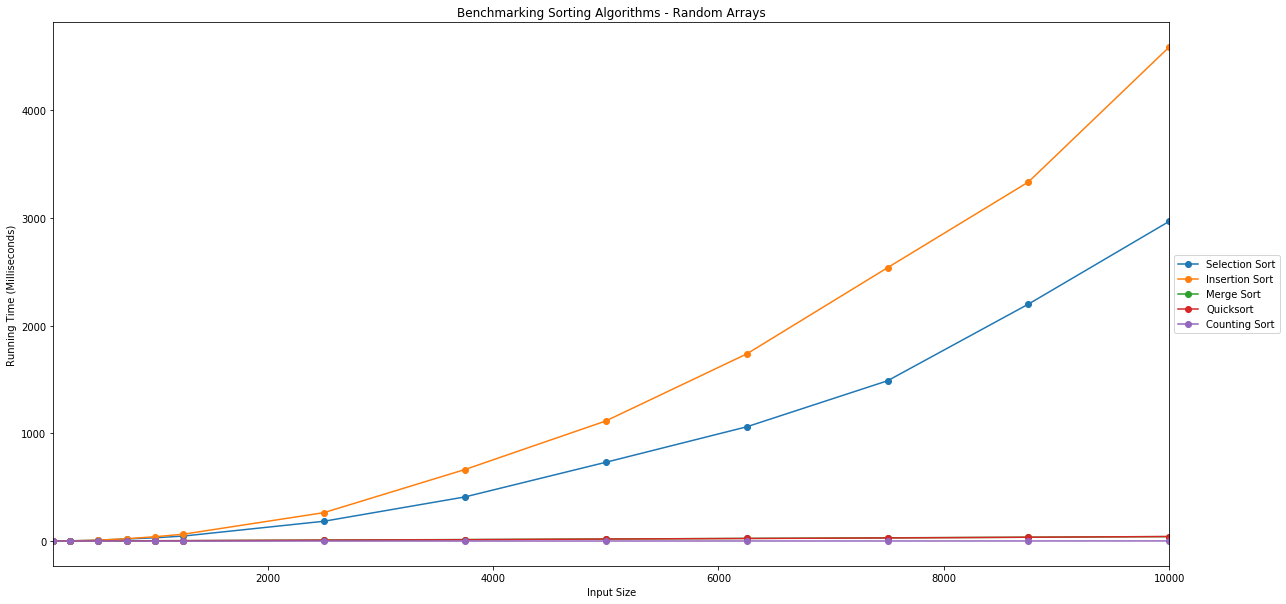

In [18]:
# plot results
plot = df.iloc[:].T.plot(title="Benchmarking Sorting Algorithms - Random Arrays", figsize=(20, 10), style='-o')
plot.set(xlabel="Input Size", ylabel="Running Time (Milliseconds)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

The results for Merge, Quick and Counting sorts above are very close to one another along the entire length of the plot above, making it difficult to discern any differences between them. To get a clearer picture, the plot below shows only the results of these algorithm implementations. 

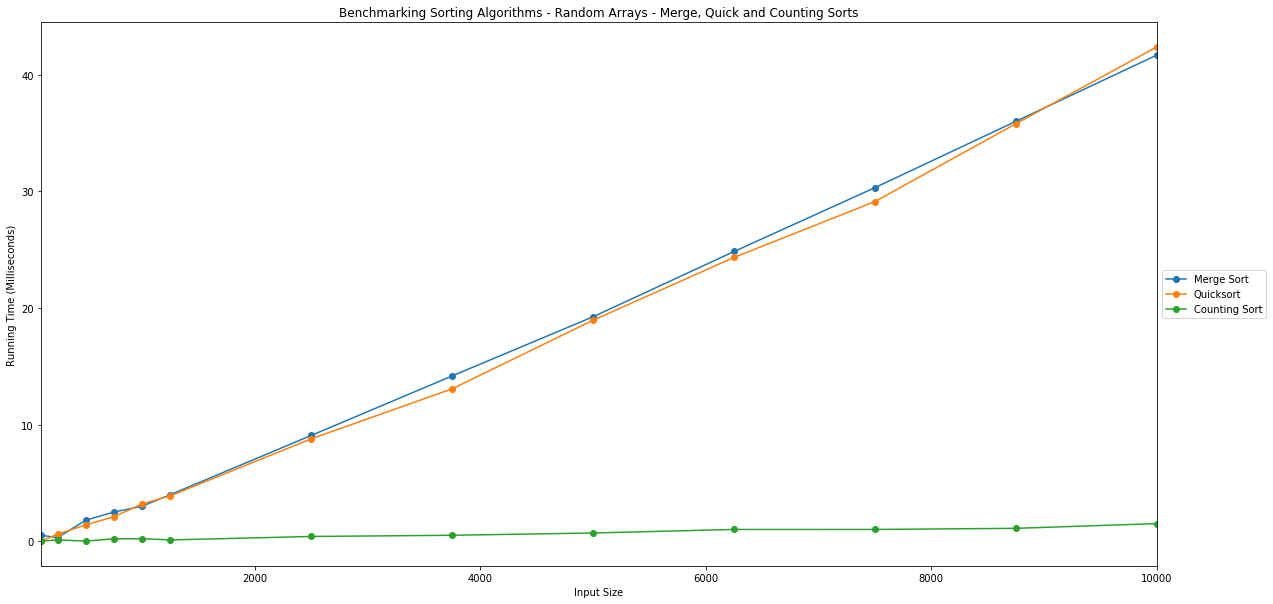

In [19]:
plot = df.iloc[2:5].T.plot(title="Benchmarking Sorting Algorithms - Random Arrays - Merge, Quick and Counting Sorts", figsize=(20, 10), style='-o')
plot.set(xlabel="Input Size", ylabel="Running Time (Milliseconds)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### Comparison with Built-In Sorting Function

The built-in sorted() function uses the hybrid Timsort algorithm. It is benchmarked and added to the dataframe below for comparison with the other algorithms.

In [20]:
# running sorted() function through benckmark and getting average times
tim_result = average_time(sorted)

# adding results to the rest of the average times
averages.append(tim_result)

In [21]:
# add Timsort to index names
algorithm_names.append('Timsort')

# create dataframe
df2 = pd.DataFrame(averages, columns=n_size, index=algorithm_names)
df2 = df2.round(3)
df2

,100,250,500,750,1000,1250,2500,3750,5000,6250,7500,8750,10000
Selection Sort,0.100,2.297,8.178,19.644,30.719,46.275,184.083,409.761,731.446,1060.793,1488.384,2200.410,2969.374
Insertion Sort,0.395,2.194,8.979,21.942,40.292,63.331,264.050,664.030,1115.022,1737.150,2538.212,3334.289,4588.498
Merge Sort,0.499,0.299,1.798,2.492,2.995,3.990,9.066,14.172,19.245,24.840,30.318,36.005,41.687
Quicksort,0.000,0.598,1.396,2.095,3.191,3.889,8.776,13.066,18.949,24.335,29.123,35.800,42.387
Counting Sort,0.000,0.100,0.000,0.200,0.199,0.100,0.397,0.500,0.695,0.999,0.998,1.095,1.501
Timsort,0.000,0.000,0.100,0.000,0.100,0.197,0.398,0.100,0.399,0.697,0.702,0.598,1.092


In [22]:
# Counting Sort and Timsort results
df2.iloc[4:6]

,100,250,500,750,1000,1250,2500,3750,5000,6250,7500,8750,10000
Counting Sort,0.0,0.1,0.0,0.2,0.199,0.100,0.397,0.5,0.695,0.999,0.998,1.095,1.501
Timsort,0.0,0.0,0.1,0.0,0.100,0.197,0.398,0.1,0.399,0.697,0.702,0.598,1.092


The plot below excludes Insertion and Selection Sorts as their average times are several orders of magnitude higher than the others. 

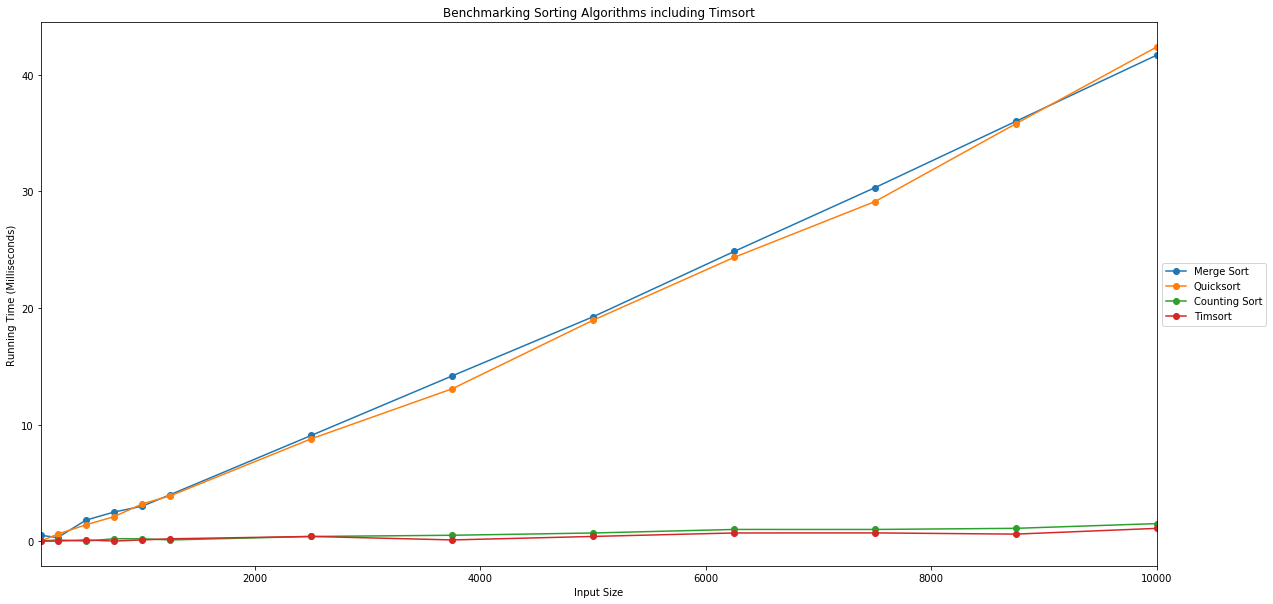

In [23]:
plot = df2.iloc[2:6].T.plot(title="Benchmarking Sorting Algorithms including Timsort", figsize=(20, 10), style='-o')
plot.set(xlabel="Input Size", ylabel="Running Time (Milliseconds)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

The plot below compares Counting Sort with Timsort.

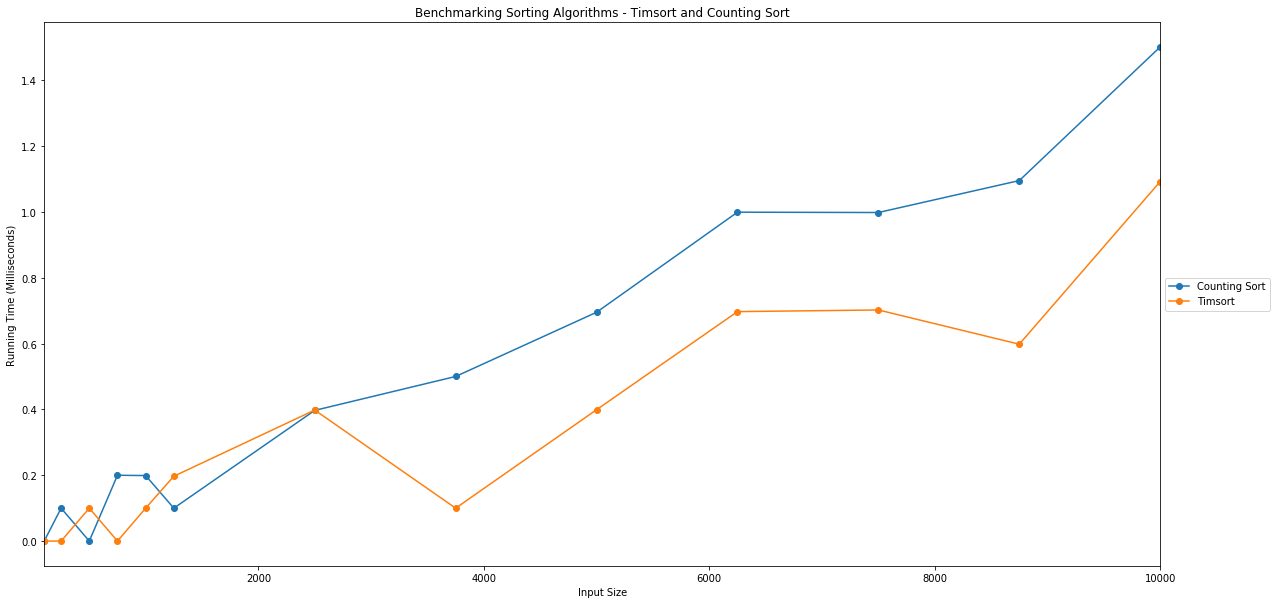

In [24]:
plot = df2.iloc[4:].T.plot(title="Benchmarking Sorting Algorithms - Timsort and Counting Sort", figsize=(20, 10), style='-o')
plot.set(xlabel="Input Size", ylabel="Running Time (Milliseconds)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [25]:
# Timsort removed from indexes
algorithm_names.remove('Timsort')

### Small Input Sizes

The code below runs the benchmarking algorithm with smaller input sizes

In [26]:
# input sizes
n_size = [5, 5, 10, 10, 15, 15, 20, 20, 25, 25, 30, 35, 40, 45, 50, 60, 70, 80, 90, 100]

In [27]:
# run benchmark
small_averages = all_averages()

In [28]:
# create dataframe
df3 = pd.DataFrame(small_averages, columns=n_size, index=algorithm_names)
df3.round(3)

,5,5,10,10,15,15,20,20,25,25,30,35,40,45,50,60,70,80,90,100
Selection Sort,0.0,0.103,0.0,0.0,0.1,0.0,0.0,0.0,0.099,0.0,0.000,0.0,0.0,0.1,0.000,0.000,0.205,0.402,0.299,0.101
Insertion Sort,0.0,0.000,0.0,0.0,0.0,0.1,0.0,0.0,0.000,0.1,0.000,0.1,0.0,0.1,0.100,0.000,0.199,0.199,0.299,0.299
Merge Sort,0.0,0.000,0.1,0.0,0.0,0.0,0.0,0.0,0.100,0.0,0.100,0.0,0.1,0.1,0.100,0.199,0.100,0.199,0.199,0.199
Quicksort,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,2.593,0.0,0.0,0.0,0.199,0.299,0.000,0.000,0.000,0.000
Counting Sort,0.0,0.000,0.0,0.1,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.1,0.000,0.000,0.100,0.000,0.000,0.000


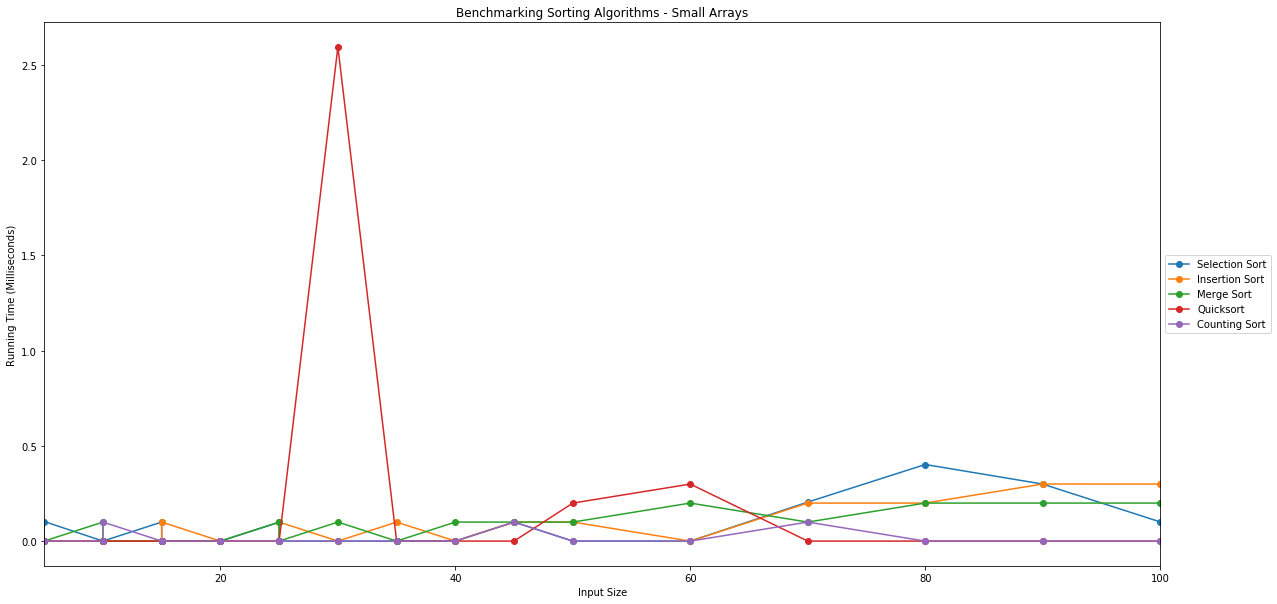

In [29]:
# plot results
plot = df3.iloc[:].T.plot(title="Benchmarking Sorting Algorithms - Small Arrays", figsize=(20, 10), style='-o')
plot.set(xlabel="Input Size", ylabel="Running Time (Milliseconds)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

###  Sorted Input

The benchmark() function is redefined to accommodate a sorted array.

In [30]:
# altering code for sorted arrays    
def benchmarking(sort):

    # creating sorted arrays
    sorted_arrays = []
    
    for i in n_size:
        sorted_list = list(range(i))    
        sorted_arrays.append(sorted_list)

    # List to contain the running times for each algorithm
    sort_time = []
    
    # time test for each sorting algorithm
    for array in sorted_arrays:
        start_time = time.time()
        sort(array)
        end_time = time.time()
        time_elapsed = (end_time - start_time) * 1000
        sort_time.append(time_elapsed)
    
    return sort_time

In [31]:
# running benchmarking for sorted arrays
sorted_averages = all_averages()

In [32]:
# creating dataframe
df4 = pd.DataFrame(sorted_averages, columns=n_size, index=algorithm_names)
df4.round(3)

,5,5,10,10,15,15,20,20,25,25,30,35,40,45,50,60,70,80,90,100
Selection Sort,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.094,0.0,0.0,0.0,0.0,0.100,0.1,0.1,0.100,0.198,0.100,0.199,0.403
Insertion Sort,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.000,0.0,0.0,0.0,0.0,0.196,0.1,0.0,0.100,0.299,0.200,0.398,0.100
Merge Sort,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.100,0.1,0.0,0.1,0.0,0.100,0.1,0.1,0.199,0.100,0.199,0.200,0.199
Quicksort,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.000,0.0,0.0,0.1,0.1,0.100,0.0,0.1,0.100,0.100,0.000,0.100,0.100
Counting Sort,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.000,0.1,0.0,0.0,0.1,0.000,0.0,0.1,0.000,0.000,0.000,0.100,0.000


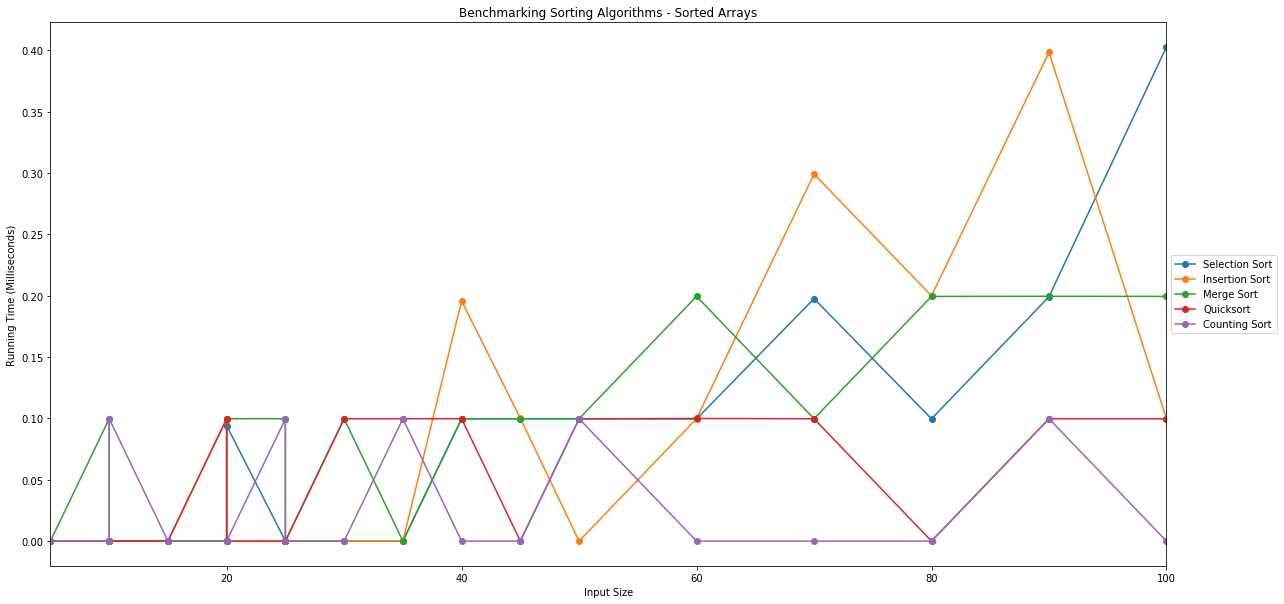

In [33]:
# plot results
plot = df4.iloc[:].T.plot(title="Benchmarking Sorting Algorithms - Sorted Arrays", figsize=(20, 10), style='-o')
plot.set(xlabel="Input Size", ylabel="Running Time (Milliseconds)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()